In [3]:
import numpy as np
import pandas as pd

##### Data is downloaded from Kaggle (https://www.kaggle.com/uciml/sms-spam-collection-dataset)

In [4]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3130,spam,LookAtMe!: Thanks for your purchase of a video...,NaN,NaN,NaN
1572,spam,Ur cash-balance is currently 500 pounds - to m...,NaN,NaN,NaN
1251,spam,Please CALL 08712402779 immediately as there i...,NaN,NaN,NaN
2938,ham,Are you ok. What happen to behave like this,NaN,NaN,NaN
2109,ham,Lara said she can loan me &lt;#&gt; .,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

## 1. Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
## drop last 3 columns as we have very limited data
df1 =df.copy()
df1.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [9]:
df1.sample(5)

,v1,v2
906,spam,"all the lastest from Stereophonics, Marley, Di..."
4983,spam,goldviking (29/M) is inviting you to be his fr...
2195,ham,V-aluable. A-ffectionate. L-oveable. E-ternal....
1211,ham,Ok then i will come to ur home after half an hour
3728,ham,I'm at home. Please call


In [10]:
# renaming columns
df1.rename(columns={'v1':'target', 'v2': 'text'}, inplace=True)
df1.sample(5)

,target,text
5450,ham,Sac needs to carry on:)
3173,ham,It vl bcum more difficult..
4675,ham,ÌÏ ready then call me...
5012,ham,"Uncle G, just checking up on you. Do have a re..."
1678,ham,So many people seems to be special at first si...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

df1['target']= encoder.fit_transform(df1['target'])

In [12]:
df1.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df1.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df1.duplicated().sum()

403

In [15]:
## Drop the duplicated values
df1 = df1.drop_duplicates(keep='first')

In [16]:
df1.duplicated().sum()

0

In [17]:
df1.shape

(5169, 2)

## 2. EDA

In [18]:
df1['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

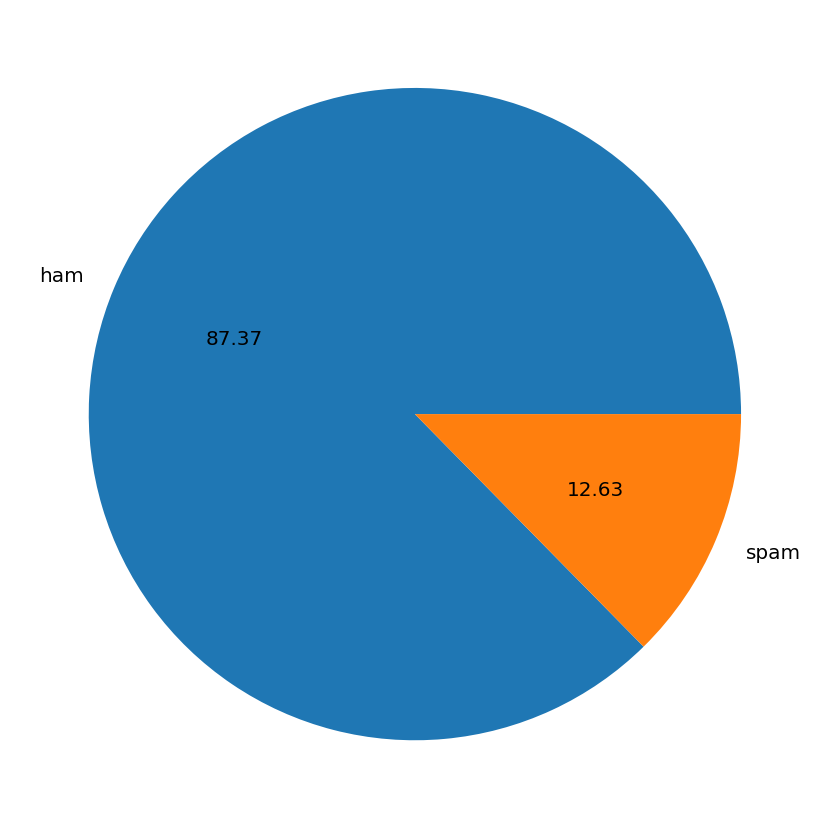

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size':20})
plt.pie(df1['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

***Target label is clearly inbalanced***

Ham values are way more than spam values

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Rajdeep
[nltk_data]     Shil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
## Characters in each sms
df1['num_character']= df1.text.apply(len)

In [23]:
df1.sample(5)

,target,text,num_character
495,0,Got meh... When?,16
1406,1,"URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD...",163
4192,0,Ok i'm coming home now.,23
5083,0,Aiya we discuss later lar... Pick Ì_ up at 4 i...,51
4015,0,In which place i can get rooms cheap:-),39


In [24]:
## number of words
df1['num_words']= df1.text.apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
df1.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df1['num_sentences']= df1.text.apply(lambda x: len(nltk.sent_tokenize(x)))
df1.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df1.describe()

,target,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [28]:
# for HAM messages 
df1[df1.target==0].describe().drop(columns='target')

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
# for SPAM messages 
df1[df1.target==1].describe().drop(columns='target')

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


**Seems like SPAM messages are usually longer and have more number of words and sentences**

### Let's visualize our findings

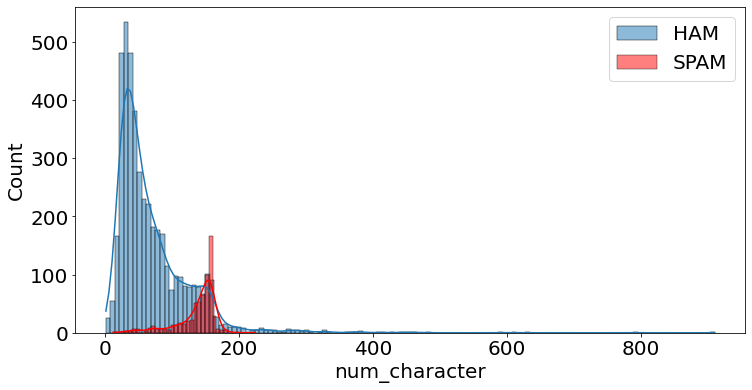

In [30]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df1[df1.target==0]['num_character'],label='HAM',kde=True)
sns.histplot(df1[df1.target==1]['num_character'],color='red',label='SPAM',kde=True)
plt.legend()


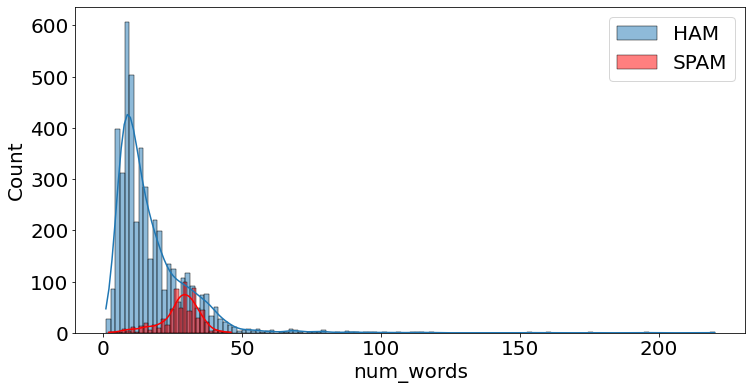

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1.target==0]['num_words'],label='HAM',kde=True)
sns.histplot(df1[df1.target==1]['num_words'],color='red',label='SPAM',kde=True)
plt.legend()

In [32]:
## Correlation
df1.corr()

,target,num_character,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_character,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<Figure size 1080x720 with 0 Axes>

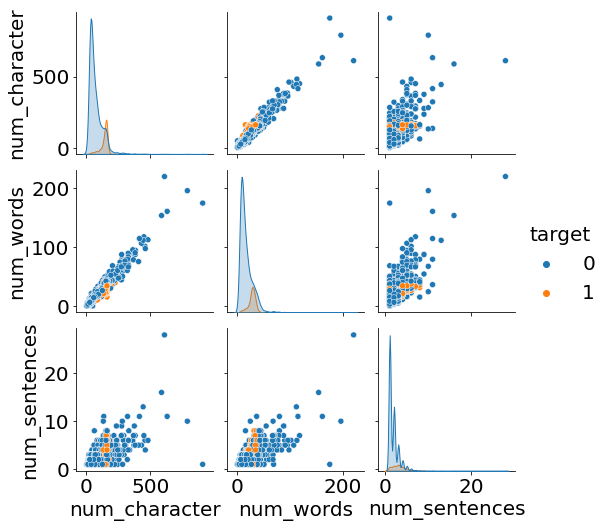

In [33]:
plt.figure(figsize=(15,10))
sns.pairplot(df1, hue='target')

<AxesSubplot:>

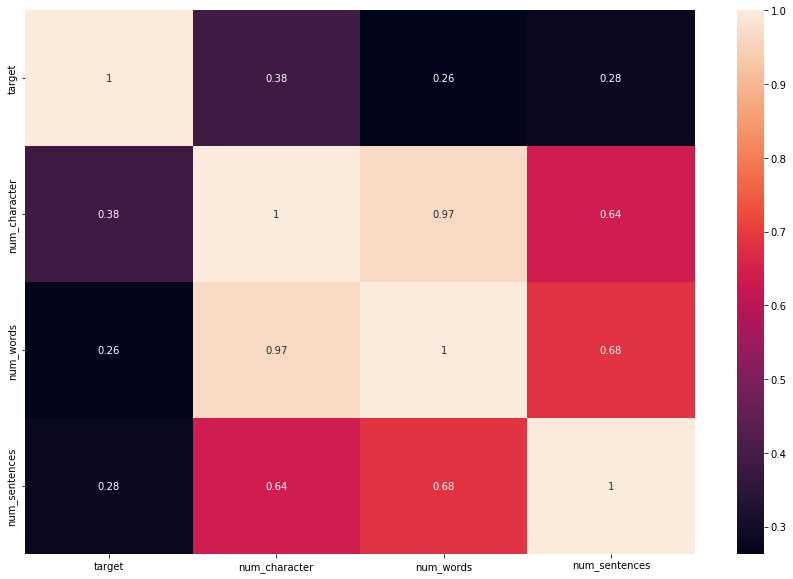

In [34]:
## Visualize correlation using SNS heatmap
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size':10})
sns.heatmap(df1.corr(),annot=True)

## 3. Data preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [64]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text =  text.lower()
    text =  nltk.word_tokenize(text)
    ps = PorterStemmer()
    y=[]
    k=[]
    # remove special characters
    for i in text:
        if i.isalnum():
            y.append(i)
    # remove stop words and punctuations
    for j in y:
        if j not in stopwords.words('english') and j not in string.punctuation:
            k.append(j)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    

    return " ".join(y)

In [67]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'i gon na be home soon and i do want to talk about thi stuff anymor tonight k i cri enough today'

In [66]:
df1.text[10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [68]:
df1['transformed_text'] =  df1['text'].apply(transform_text)

In [70]:
df1.transformed_text.head()

0    go until jurong point crazi avail onli in bugi...
1                                ok lar joke wif u oni
2    free entri in 2 a wkli comp to win fa cup fina...
3          u dun say so earli hor u c alreadi then say
4    nah i do think he goe to usf he live around he...
Name: transformed_text, dtype: object

In [73]:
from wordcloud import WordCloud

In [83]:
wc = WordCloud(width=1000, height=1000, min_font_size=14, background_color='white')

In [84]:
spam_wc= wc.generate(df1[df1['target']==1]['transformed_text'].str.cat(sep=' '))

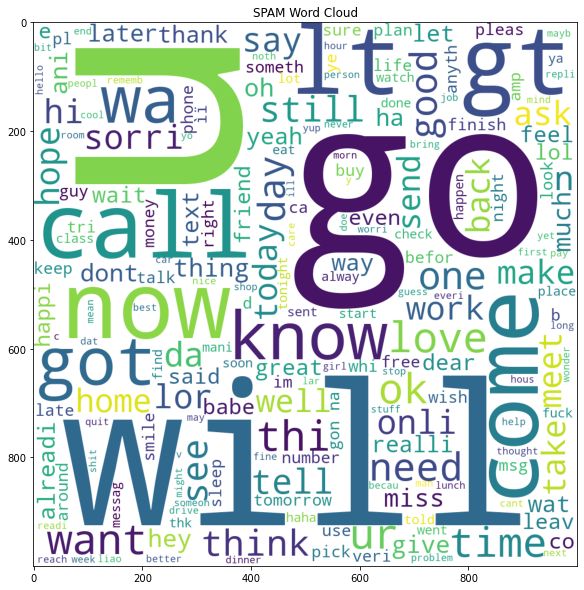

In [90]:
# plotting word cloud for spam messages
plt.figure(figsize=(15,10))
plt.title('SPAM Word Cloud')
plt.imshow(spam_wc)

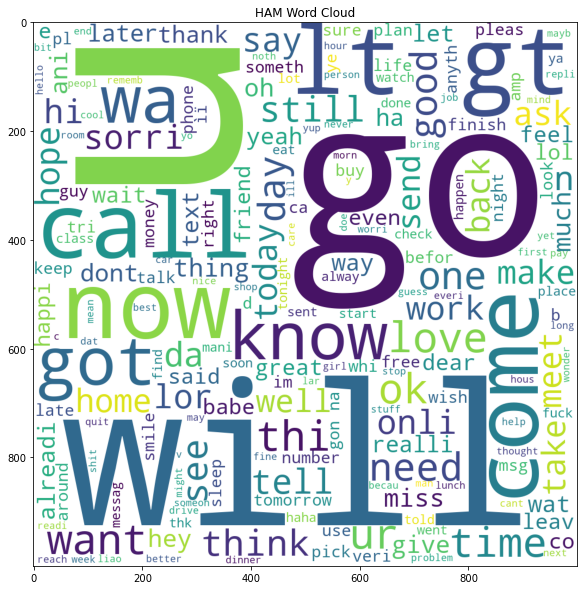

In [89]:
ham_wc= wc.generate(df1[df1['target']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15,10))
plt.title('HAM Word Cloud')
plt.imshow(ham_wc)


In [92]:
ham_corp = []
for msg in df1[df1['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corp.append(word)

In [93]:
spam_corp=[]
for msg in df1[df1['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corp.append(word)

C:\Users\Rajdeep Shil\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


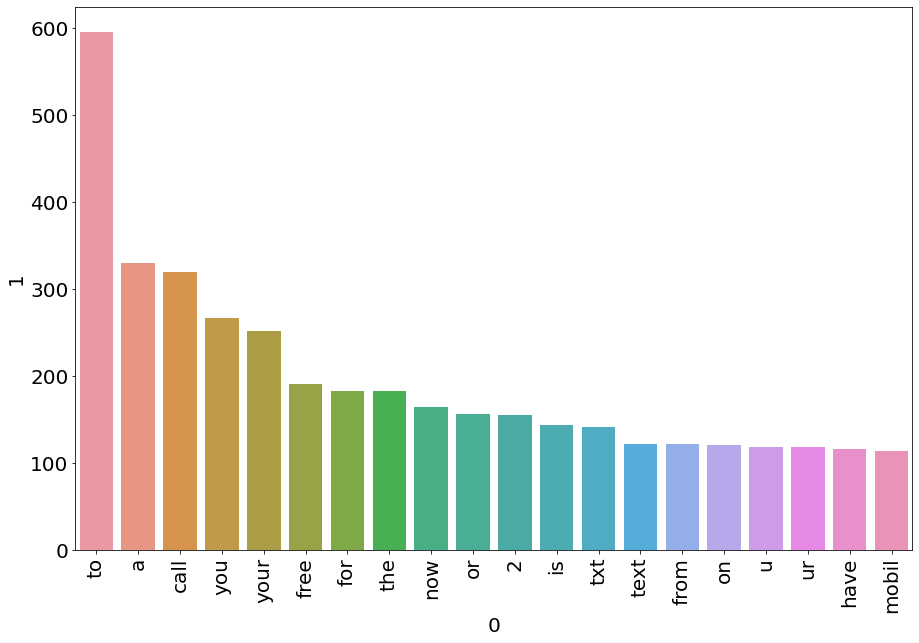

In [101]:
from collections import Counter
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size':20})
sns.barplot(pd.DataFrame(Counter(spam_corp).most_common(20))[0], pd.DataFrame(Counter(spam_corp).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Rajdeep Shil\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


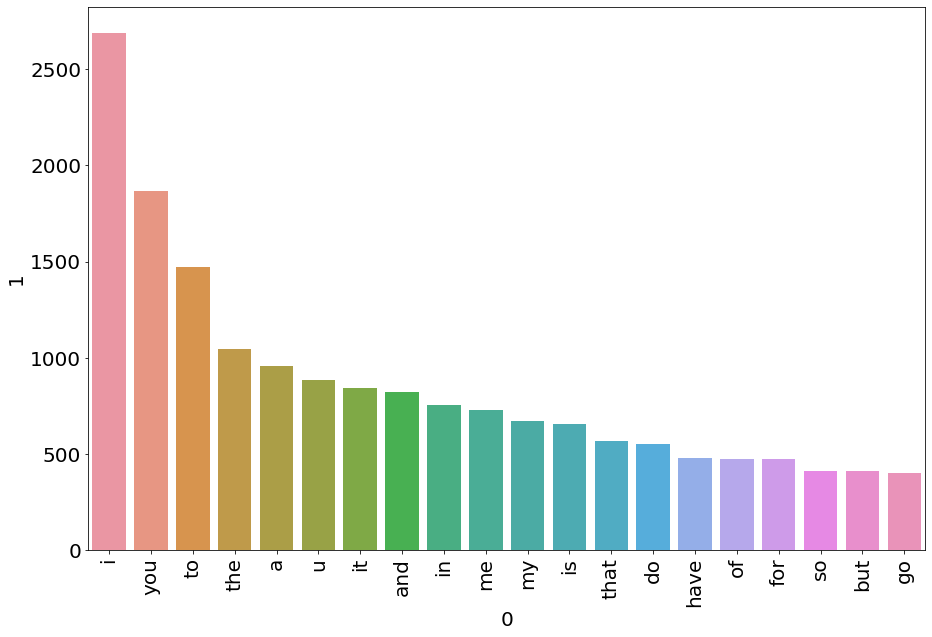

In [102]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size':20})
sns.barplot(pd.DataFrame(Counter(ham_corp).most_common(20))[0], pd.DataFrame(Counter(ham_corp).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(df1['transformed_text']).toarray()



In [106]:
X.shape

(5169, 6796)

In [107]:
Y =df1.target.values

In [108]:
Y

array([0, 0, 1, ..., 0, 0, 0])

##### Train test split

In [109]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

#### Naive Baye's Classifier (Bag of words)

In [146]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [111]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [119]:
gnb.fit(x_train, y_train)
y_pred1 =  gnb.predict(x_test)
print ('Accuracy Score GNB')
print(accuracy_score(y_test, y_pred1))
print ('#############################')
print ('CM')
print (confusion_matrix(y_test, y_pred1))
print ('#############################')
print ('Precision Score')
print (precision_score(y_test, y_pred1))

Accuracy Score GNB
0.8887814313346228
#############################
CM
[[801  95]
 [ 20 118]]
#############################
Precision Score
0.5539906103286385


In [118]:
mnb.fit(x_train, y_train)
y_pred2 =  mnb.predict(x_test)
print ('Accuracy Score MNB')
print(accuracy_score(y_test, y_pred2))
print ('#############################')
print ('CM')
print (confusion_matrix(y_test, y_pred2))
print ('#############################')
print ('Precision Score')
print (precision_score(y_test, y_pred2))

Accuracy Score MNB
0.9671179883945842
#############################
CM
[[874  22]
 [ 12 126]]
#############################
Precision Score
0.8513513513513513


In [121]:
bnb.fit(x_train, y_train)
y_pred3 =  bnb.predict(x_test)
print ('Accuracy Score BNB')
print (accuracy_score(y_test, y_pred3))
print ('#############################')
print ('CM')
print (confusion_matrix(y_test, y_pred3))
print ('#############################')
print ('Precision Score')
print (precision_score(y_test, y_pred3))

Accuracy Score BNB
0.9748549323017408
#############################
CM
[[893   3]
 [ 23 115]]
#############################
Precision Score
0.9745762711864406


##### Naive Bayes (TFIDF Vectorizer)

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)


In [132]:
X = tfidf.fit_transform(df1['transformed_text']).toarray()
Y =df1.target.values
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [133]:
gnb.fit(x_train, y_train)
y_pred1 =  gnb.predict(x_test)
print ('Accuracy Score GNB')
print(accuracy_score(y_test, y_pred1))
print ('#############################')
print ('CM')
print (confusion_matrix(y_test, y_pred1))
print ('#############################')
print ('Precision Score')
print (precision_score(y_test, y_pred1))

Accuracy Score GNB
0.8771760154738878
#############################
CM
[[792 104]
 [ 23 115]]
#############################
Precision Score
0.5251141552511416


In [134]:
mnb.fit(x_train, y_train)
y_pred2 =  mnb.predict(x_test)
print ('Accuracy Score MNB')
print(accuracy_score(y_test, y_pred2))
print ('#############################')
print ('CM')
print (confusion_matrix(y_test, y_pred2))
print ('#############################')
print ('Precision Score')
print (precision_score(y_test, y_pred2))

Accuracy Score MNB
0.9680851063829787
#############################
CM
[[896   0]
 [ 33 105]]
#############################
Precision Score
1.0


In [135]:
bnb.fit(x_train, y_train)
y_pred3 =  bnb.predict(x_test)
print ('Accuracy Score BNB')
print (accuracy_score(y_test, y_pred3))
print ('#############################')
print ('CM')
print (confusion_matrix(y_test, y_pred3))
print ('#############################')
print ('Precision Score')
print (precision_score(y_test, y_pred3))

Accuracy Score BNB
0.9806576402321083
#############################
CM
[[893   3]
 [ 17 121]]
#############################
Precision Score
0.9758064516129032


***We want our classifier to be more precise than overall accuracy as the data is inbalanced***

##### I would go with ***MLB naive Bayes*** as precision score is the highest with TFIDF vectorizer

Before taking the decision of what algorith we should use, let's see how other classifier work with this problem

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [138]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [139]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [147]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [148]:
accuracy_s=[]
precision_s=[]

for name, clf in clfs.items():
    accuracy,precision = train_classifier(clf,x_train, y_train,x_test,y_test)
    print ("For {}".format(name) + ' Classifier')
    print ("Accuracy ----> {}".format(accuracy))
    print ("Precision ----> {}".format(precision))
    accuracy_s.append(accuracy)
    precision_s.append(precision)


For SVC Classifier
Accuracy ----> 0.9806576402321083
Precision ----> 0.9836065573770492
For KN Classifier
Accuracy ----> 0.90715667311412
Precision ----> 1.0
For NB Classifier
Accuracy ----> 0.9680851063829787
Precision ----> 1.0
For DT Classifier
Accuracy ----> 0.9303675048355899
Precision ----> 0.84375
For LR Classifier
Accuracy ----> 0.9622823984526112
Precision ----> 0.9459459459459459
For RF Classifier
Accuracy ----> 0.971953578336557
Precision ----> 1.0
For AdaBoost Classifier
Accuracy ----> 0.9680851063829787
Precision ----> 0.926829268292683
For BgC Classifier
Accuracy ----> 0.9661508704061895
Precision ----> 0.9186991869918699
For ETC Classifier
Accuracy ----> 0.9796905222437138
Precision ----> 0.9834710743801653
For GBDT Classifier
Accuracy ----> 0.9564796905222437
Precision ----> 0.9428571428571428


C:\Users\Rajdeep Shil\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:46:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For xgb Classifier
Accuracy ----> 0.9835589941972921
Precision ----> 0.9763779527559056


In [150]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_s,'Precision':precision_s}).sort_values('Precision',ascending=False)

In [160]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.968085,1.000000
5,RF,0.971954,1.000000
0,SVC,0.980658,0.983607
8,ETC,0.979691,0.983471
10,xgb,0.983559,0.976378
4,LR,0.962282,0.945946
9,GBDT,0.956480,0.942857
6,AdaBoost,0.968085,0.926829
7,BgC,0.966151,0.918699


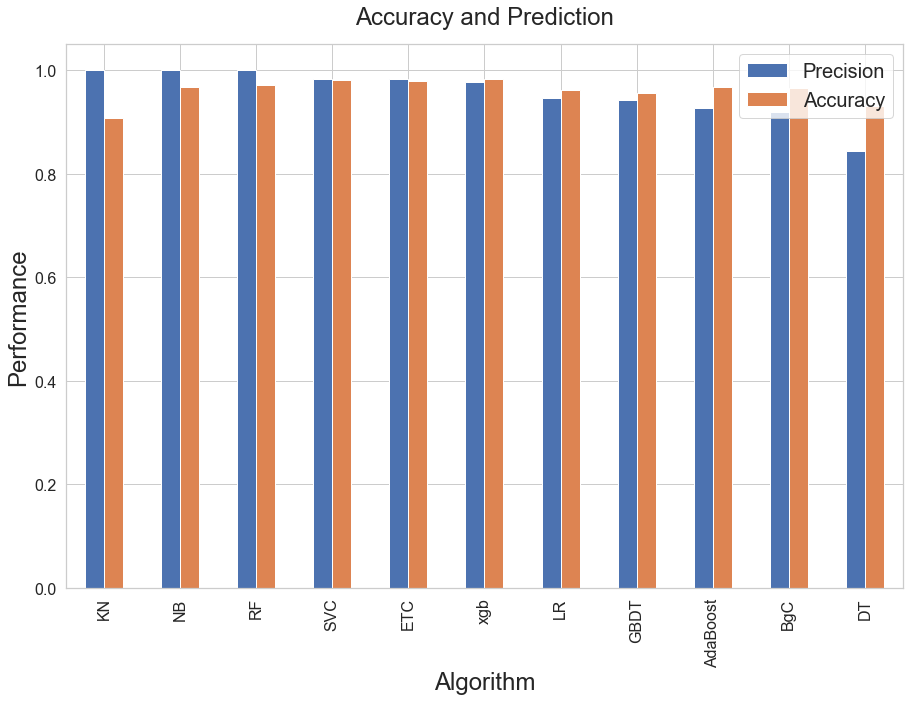

In [190]:
## Plotting the perfomrce of classifiers
ax3 = performance_df.plot(x="Algorithm", y=["Precision", "Accuracy"],kind="bar",figsize=(15, 10), fontsize=16)
ax3.set_title('Accuracy and Prediction',pad=20, fontdict={'fontsize':24})
ax3.set_ylabel('Performance', fontdict={'fontsize':24})
ax3.set_xlabel('Algorithm', fontdict={'fontsize':24})
ax3.legend(loc='upper right',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

#### Voter Classifier (Ensemble of the top 3 classifier)

**I have chosen Naive Bayes, Extra Tree classifier and SVC as top performing classifier based on the precision score**


In [196]:
from sklearn.ensemble import VotingClassifier

# group / ensemble of models
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
estimator = [('svm', svc), ('MNB', mnb), ('ETC',etc)]





In [198]:
voting = VotingClassifier(estimator,voting='soft')

In [199]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('MNB', MultinomialNB()),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [200]:
y_pred5 = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred5))
print("Precision",precision_score(y_test,y_pred5))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


***I can use the above ensemble of classifiers but the precision is decreasing when we are trying to increase the accuracy. For now Normal MNB is working the best***
### Let's try Stacking as well

In [201]:
final_estimator=RandomForestClassifier()

In [202]:
from sklearn.ensemble import StackingClassifier

In [204]:
clf = StackingClassifier(estimators=estimator, final_estimator=final_estimator)
clf.fit(x_train,y_train)
y_pred6 = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred6))
print("Precision",precision_score(y_test,y_pred6))


Accuracy 0.9825918762088974
Precision 0.9615384615384616


#### I think I have done enough. I am going with <u>**Multinomial Naive Bayes Classifier**</u>  as my final choice for this project

## Model export

In [205]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))